# Hunter's Specification Rate within the Irrigation Market Analysis (w/o Variational Autoencoding)

**Author**: Christine Law, Marketing Analyst Intern

<!-- **Website Link**: [specrate website](https://www.markdownguide.org/cheat-sheet/) -->

# Introduction

Hello!

My name is Christine Law and welcome to my data analysis on Hunter's specification rate within the irrigation market. 

> Project Information

In order to better understand Hunter's market share, we need to find out more information about its specification rate. Since we are missing vital information regarding the size
of the specification market, **my role is to find a way to better estimate the monetary value of Hunter's specification rate within the irrigation market.** More specifically, I focused on projects that were valued at at least $1 million and were bid in 2023 since that was the first full year of "normal" data post-pandemic.

> Outline

- Phase 1: Extrapolating data from DodgeBI
- Phase 2: Manipulating data to figure out market share
- Phase 3: Working with sales to gain alignment and feedback
 
At the end of this notebook, I also detail my journey and thought process throughout the whole project.

> Goals
1. Generate relevant data visualizations to better help understand the dataset.

    -  distribution of building type 
    - distribution and frequency of mix manufacturers 
    - relationship between square footage and number of valves
    - trend amongst Hunter's 9 regions' irrigation monetary value

2. Hypothesis Testing & Building a Predictive Model

    - To what magnitude does square footage/valve count/overall value predict irrigation monetary value?


# Step 1: Importing Necessary Packages and Generating Dataset

Here I will import packages that will help me manipulate the dataset I created from extrapolating data from DodgeBI.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df = pd.read_csv('dataset/new_acre_valve.csv')
df.head()

,id,region,building_type,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,mix_manufacturers,value_mill,general_contractor
0,202100847180,Central States,hospital,186652.0,14,0,5,0,19,True,25.2,Harvey Clearly Builders
1,201900664272,Central States,school,28760.0,23,0,0,26,49,True,38.0,Pogue Construction
2,202300402748,Central States,school,122296.0,27,0,11,7,45,False,20.0,Noble Texas Builders
3,202300441418,Central States,school,8695.0,6,0,0,1,7,True,3.0,NaN
4,202300082736,Central States,housing,3292.0,0,6,0,0,6,False,5.2,Cheyenne Construction Group


In [3]:
df.shape

(90, 12)

I've generated the first 5 entries to showcase the 12 variables the dataset utilizes. There are 10 entries for the 9 regions, for a total of 90 datapoints.

Below I've detailed what each column contains.

| Column             | Description                                                                                                                                                                                       |
| :----------------- | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `'id'`           | Project ID                                                                                                                                                        |
| `'region'`             | Project Region                                                                                                                                         |
| `'building_type'`        | Type of Building                                                                                                                                                |
| `'square_feet'` | The Total Landscape Area                                                                                                                                                  |
| `'spray_count'`      | Number of Spray-Valves                                                                                                                                                        |
| `'mp_count'`           | Number of MP-Valves                                                                                                                                                     |
| `'drip_count'`      | Number of Drip-Valves |
| `'rotor_count'`        | Number of Rotor-Valves                                                                                                                                        |
| `'valve_count'`          | Total Number of Valves on Project                                                                                                                                          |
| `'mix_manufacturers'`    | Project Contains Various Maufacturers                                                                                                                                                      |
| `'value_mill'`    | Project's Total Value                                                                                                                                                           |
| `'general_contractor'`  | General Contractor in Charge of Project

# Step 2: Data Cleaning

Now we'll make sure each column is the expected data type.

In [4]:
# iterates through all of the columns and prints out the data type
def col_type(df):
    for column in df.columns:
        print(f"'{column}': {df[column].dtype}")

col_type(df)
    

'id': int64
'region': object
'building_type': object
'square_feet': float64
'spray_count': int64
'mp_count': int64
'drip_count': int64
'rotor_count': int64
'valve_count': int64
'mix_manufacturers': bool
'value_mill': float64
'general_contractor': object


We see that `'region'`, `'building_type'`, and `'general_contractor'` are listed as objects, but for easy manipulation I will be cast them to **strings**.

In [5]:
# iterates through the columns and change any object types to string

def object_string(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].astype(str)
    return df.head()
        
object_string(df)

,id,region,building_type,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,mix_manufacturers,value_mill,general_contractor
0,202100847180,Central States,hospital,186652.0,14,0,5,0,19,True,25.2,Harvey Clearly Builders
1,201900664272,Central States,school,28760.0,23,0,0,26,49,True,38.0,Pogue Construction
2,202300402748,Central States,school,122296.0,27,0,11,7,45,False,20.0,Noble Texas Builders
3,202300441418,Central States,school,8695.0,6,0,0,1,7,True,3.0,nan
4,202300082736,Central States,housing,3292.0,0,6,0,0,6,False,5.2,Cheyenne Construction Group


There are a few entires of 'nan' in the `'general_contractor'` column that we will convert into NaN, so when manipulating the data is seen as a missing value and not a string.

In [6]:
df.replace('nan', np.nan, inplace=True)

df.head()

,id,region,building_type,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,mix_manufacturers,value_mill,general_contractor
0,202100847180,Central States,hospital,186652.0,14,0,5,0,19,True,25.2,Harvey Clearly Builders
1,201900664272,Central States,school,28760.0,23,0,0,26,49,True,38.0,Pogue Construction
2,202300402748,Central States,school,122296.0,27,0,11,7,45,False,20.0,Noble Texas Builders
3,202300441418,Central States,school,8695.0,6,0,0,1,7,True,3.0,NaN
4,202300082736,Central States,housing,3292.0,0,6,0,0,6,False,5.2,Cheyenne Construction Group


To ensure similar entries are properly combined, we are going to strip any leading and trailing spaces for columns that contain strings.

In [7]:
df['building_type'] = df['building_type'].str.strip()
df['region'] = df['region'].str.strip()
df['general_contractor'] = df['general_contractor'].str.strip()

Now I will be creating a new column that contains the estimated irrigation value. I've listed the table containing the gross estimate values.

| Name | Valve | Application Device QTY | Total Application Device Dist. Net | Valve Total by Emission Type (Multiplier) |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| `'Rotor Valve'` | $81.30 |  5  | $107.50 | $188.80 |
| `'MP Valve'` | $81.30 |  23  | $282.90 | $364.20 |
|`'Spray Valve'`| $81.30 |  20  | $170.80 | $252.10 |
| `'Drip Valve'` | $81.30 |  2000  | $340.00 | $475.00 |

<br> 

| Name | Avg Domestic Cost |
| ----------- | ----------- |
| `'Valve'` | $81.30 |
| `'MP'` | $12.30 |
| `'Rotor'` | $21.50 |
| `'Spray Nozzle'` | $8.54 |
| `'Drip'` | $0.17 |
| `'Swing Arm (MP/Spray)'` | $1.29 |
| `'Spray Nozzle'` | $6.75 |

1. These numbers are all gross estimates and don’t include various variables such as labor costs and additional material needed to install the irrigation system, we are just considering the price for the valve and sprinkler heads. 
    - Ex. the $81.30 valve price was reached by dividing (total sales of valves in 2023/total valve quantity sold in 2023)
2. 	I would then use that multiplier value to obtain the estimated irrigation value of that project.
    - Ex. There are 26 rotors on the 2nd project entry so I’d multiply 26*188.80 and continue to do the same to all of the emission types from that project
3.	We also assumed that the domestic gpm would be 20 gpm which was how we got the numbers under the “Application device  QTY” column
    - Ex. Typically there are 5 rotors attached to a valve flowing at 20 gpm



In [8]:
df.head()

,id,region,building_type,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,mix_manufacturers,value_mill,general_contractor
0,202100847180,Central States,hospital,186652.0,14,0,5,0,19,True,25.2,Harvey Clearly Builders
1,201900664272,Central States,school,28760.0,23,0,0,26,49,True,38.0,Pogue Construction
2,202300402748,Central States,school,122296.0,27,0,11,7,45,False,20.0,Noble Texas Builders
3,202300441418,Central States,school,8695.0,6,0,0,1,7,True,3.0,NaN
4,202300082736,Central States,housing,3292.0,0,6,0,0,6,False,5.2,Cheyenne Construction Group


In [9]:
# Creating function to return new column with estimated irrigation value

def calculate_new_col(col):
    return col['spray_count']*252.1 + col['mp_count']*364.2 + col['drip_count']*475 + col['rotor_count']*188.8 

# Apply function to create new column
df['est_irrig_value'] = df.apply(calculate_new_col, axis=1)

df.head()

,id,region,building_type,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,mix_manufacturers,value_mill,general_contractor,est_irrig_value
0,202100847180,Central States,hospital,186652.0,14,0,5,0,19,True,25.2,Harvey Clearly Builders,5904.4
1,201900664272,Central States,school,28760.0,23,0,0,26,49,True,38.0,Pogue Construction,10707.1
2,202300402748,Central States,school,122296.0,27,0,11,7,45,False,20.0,Noble Texas Builders,13353.3
3,202300441418,Central States,school,8695.0,6,0,0,1,7,True,3.0,NaN,1701.4
4,202300082736,Central States,housing,3292.0,0,6,0,0,6,False,5.2,Cheyenne Construction Group,2185.2


In [10]:
df.describe()

,id,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,value_mill,est_irrig_value
count,9.000000e+01,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,2.021971e+11,8.465028e+04,7.133333,5.988889,2.688889,4.811111,20.622222,13.956667,6165.026667
std,2.105212e+08,1.956396e+05,9.570789,16.785825,5.049518,11.313604,19.823705,24.514050,6243.483170
min,2.010007e+11,8.475000e+02,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,504.200000
25%,2.022007e+11,7.101750e+03,0.000000,0.000000,0.000000,0.000000,8.250000,2.000000,2661.075000
50%,2.023002e+11,1.397250e+04,3.500000,0.000000,0.000000,0.000000,15.000000,5.900000,4540.500000
75%,2.023004e+11,6.602250e+04,9.750000,3.000000,4.000000,3.000000,26.000000,13.625000,7716.550000
max,2.023004e+11,1.453896e+06,56.000000,131.000000,26.000000,66.000000,131.000000,183.700000,47710.200000


# Step 3: Expanding Dataset using Variational Autoencoders

In [11]:
from numpy.linalg import inv
from tqdm import tqdm
import random
%matplotlib inline

import scipy
from sklearn.impute import KNNImputer

from numpy.core.multiarray import concatenate

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pytorch_lightning as pl

In [12]:
# Seaborn Style
palette = 'tab10'
sns.set(style='whitegrid', palette=palette)

# Sead
# pl.seed_everything(42)
np.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

In [13]:
df.head()
#one-hot encoding
#normalize data 

,id,region,building_type,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,mix_manufacturers,value_mill,general_contractor,est_irrig_value
0,202100847180,Central States,hospital,186652.0,14,0,5,0,19,True,25.2,Harvey Clearly Builders,5904.4
1,201900664272,Central States,school,28760.0,23,0,0,26,49,True,38.0,Pogue Construction,10707.1
2,202300402748,Central States,school,122296.0,27,0,11,7,45,False,20.0,Noble Texas Builders,13353.3
3,202300441418,Central States,school,8695.0,6,0,0,1,7,True,3.0,NaN,1701.4
4,202300082736,Central States,housing,3292.0,0,6,0,0,6,False,5.2,Cheyenne Construction Group,2185.2


To start, we will first one-hot encode the categorical variables which essentially means I'll be converting qualitative variables into numerical ones. 

In [14]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [15]:
# df containing one-hot encoding for categorical values and pre-existing numerical values

# pd_df = df.drop(['square_feet','spray_count','mp_count','drip_count','rotor_count','valve_count','value_mill','est_irrig_value','general_contractor'], axis=1)
pd_df = df.drop(['general_contractor'], axis=1)

categorical_columns = pd_df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(pd_df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([pd_df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

df_encoded

,id,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,mix_manufacturers,value_mill,est_irrig_value,...,building_type_passenger terminal,building_type_paving,building_type_pool,building_type_recreational,building_type_retail,building_type_school,building_type_senior center,building_type_theater,building_type_warehouse,building_type_water pump
0,202100847180,186652.0,14,0,5,0,19,True,25.2,5904.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,201900664272,28760.0,23,0,0,26,49,True,38.0,10707.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,202300402748,122296.0,27,0,11,7,45,False,20.0,13353.3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,202300441418,8695.0,6,0,0,1,7,True,3.0,1701.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,202300082736,3292.0,0,6,0,0,6,False,5.2,2185.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,201800874205,14489.0,7,10,0,0,17,True,43.0,5406.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,202300387167,13195.0,26,0,2,0,28,True,2.0,7504.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,202300422719,5606.0,0,0,2,0,2,True,2.3,950.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,202300320241,62130.0,2,0,0,21,23,True,5.1,4469.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
id_column = df_encoded[['id']]
features = df_encoded.drop(columns=['id'])

scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the encoded data
normalized_array = scaler.fit_transform(features)

# Create a DataFrame from the normalized array
normalized_df = pd.DataFrame(normalized_array, columns=features.columns)

final_df = pd.concat([id_column.reset_index(drop=True), normalized_df.reset_index(drop=True)], axis=1)

final_df


,id,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,mix_manufacturers,value_mill,est_irrig_value,...,building_type_passenger terminal,building_type_paving,building_type_pool,building_type_recreational,building_type_retail,building_type_school,building_type_senior center,building_type_theater,building_type_warehouse,building_type_water pump
0,202100847180,-0.744256,-0.500000,-1.000000,-0.615385,-1.000000,-0.736434,1.0,-0.735085,-0.771207,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,201900664272,-0.961581,-0.178571,-1.000000,-1.000000,-0.212121,-0.271318,1.0,-0.594964,-0.567729,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
2,202300402748,-0.832836,-0.035714,-1.000000,-0.153846,-0.787879,-0.333333,-1.0,-0.792009,-0.455616,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
3,202300441418,-0.989199,-0.785714,-1.000000,-1.000000,-0.969697,-0.922481,1.0,-0.978106,-0.949278,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
4,202300082736,-0.996635,-1.000000,-0.908397,-1.000000,-1.000000,-0.937984,-1.0,-0.954023,-0.928780,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,201800874205,-0.981224,-0.750000,-0.847328,-1.000000,-1.000000,-0.767442,1.0,-0.540230,-0.792293,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
86,202300387167,-0.983005,-0.071429,-1.000000,-0.846154,-1.000000,-0.596899,1.0,-0.989053,-0.703411,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
87,202300422719,-0.993450,-1.000000,-1.000000,-0.846154,-1.000000,-1.000000,1.0,-0.985769,-0.981113,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
88,202300320241,-0.915650,-0.928571,-1.000000,-1.000000,-0.363636,-0.674419,1.0,-0.955118,-0.832021,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


#### Explanatory Data Analysis 

Below I've generated a correlation matrix which displays pairwise correlations between variables in the dataset.

Examples:
1. 'est_irrig_value' and 'valve_count' have a strong positive correlation (0.95), revealing that a higher estimated value tend to have a higher valve count
2. 'drip_count' and 'mp_count' have a very weak negative correlation (-0.18), revealing that a lower drip count tend to have a higher drip count and vice versa

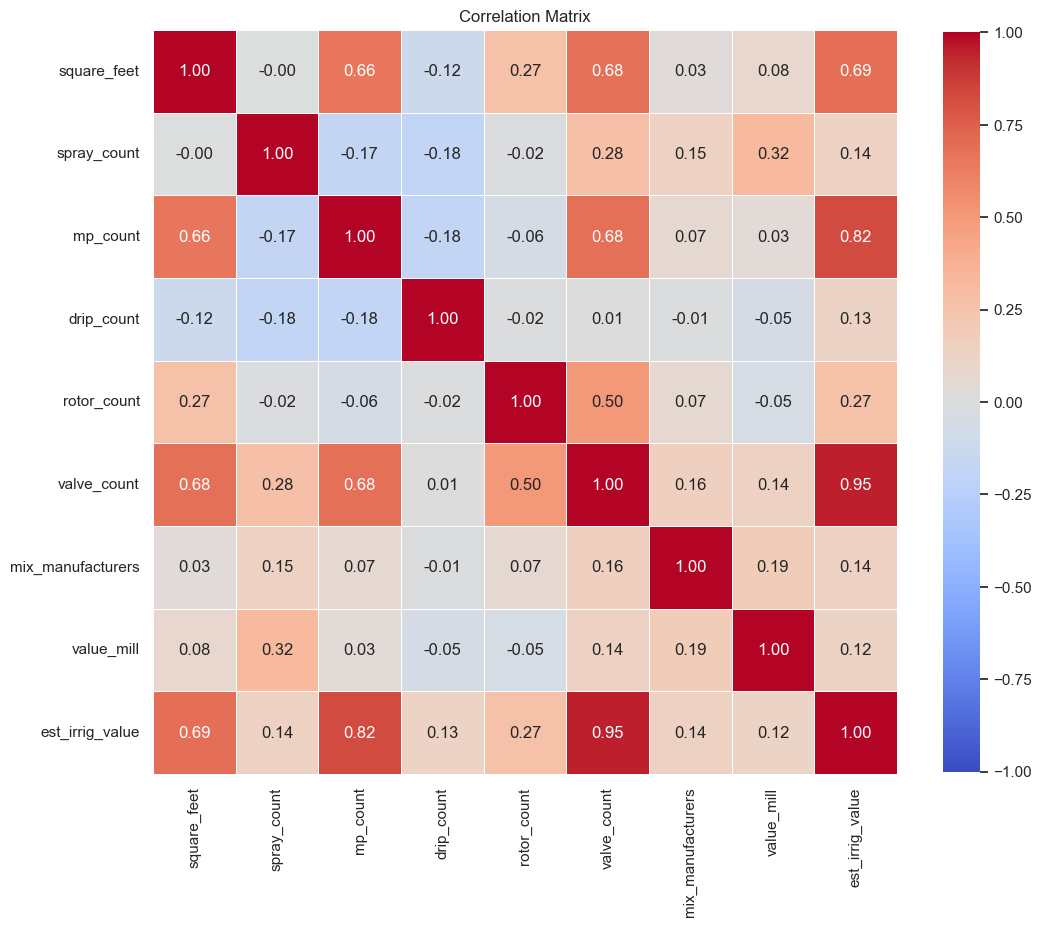

In [17]:
# sector = df
cols_range = df.iloc[:, 3:11]  
col_12 = df.iloc[:, 12] 

combined_df = pd.concat([cols_range, col_12], axis=1)

correlation = combined_df.corr()

plt.figure(figsize=(12, 12))

sns.heatmap(correlation,
            vmin=-1, vmax=1, center=0,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8}
            )

plt.title("Correlation Matrix")
plt.show()

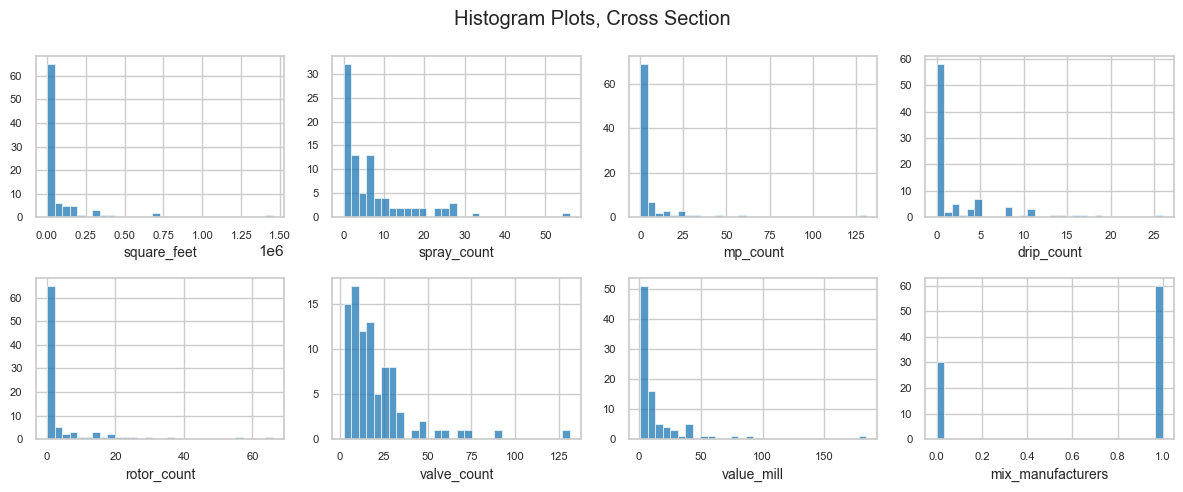

In [18]:
selected_fields = ['square_feet', 
                   'spray_count', 
                   'mp_count',
                   'drip_count',
                   'rotor_count',
                   'valve_count',
                   'value_mill',
                   'mix_manufacturers']

df_subset = df.iloc[:, 3:].reset_index(drop=True)

num_fields = len(selected_fields)
num_rows = (num_fields + 3) // 4
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5))

axes = axes.flatten()

for i, field in enumerate(selected_fields):
    ax = axes[i]
    sns.histplot(data=df_subset[field], ax=ax, bins=30, legend=False)
    ax.set_xlabel(field, fontsize=10)
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='major', labelsize=8)

for j in range(num_fields, num_rows * num_cols):
    axes[j].axis('off')

title = "Histogram Plots, Cross Section"
plt.suptitle(title)
plt.tight_layout()
plt.show()


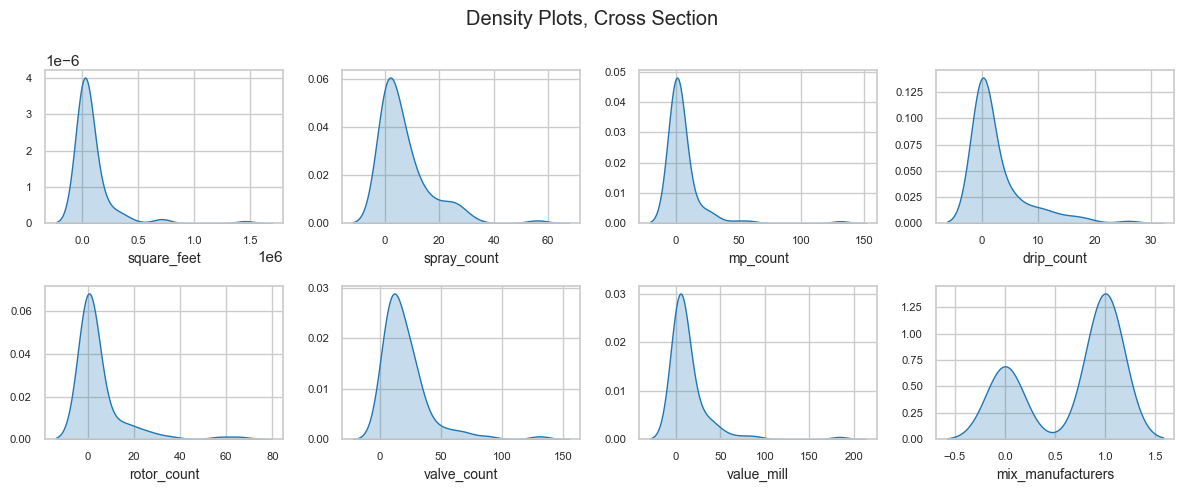

In [19]:
df_subset = df.iloc[:, 3:].reset_index(drop=True)

num_fields = len(selected_fields)
num_rows = (num_fields + 3) // 4
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5))

axes = axes.flatten()

for i, field in enumerate(selected_fields):
    ax = axes[i]
    sns.kdeplot(data=df_subset[field], ax=ax, fill=True, legend=False)
    ax.set_xlabel(field, fontsize=10)
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='major', labelsize=8)

for j in range(num_fields, num_rows * num_cols):
    axes[j].axis('off')

title = "Density Plots, Cross Section"
plt.suptitle(title)
plt.tight_layout()
plt.show()

From these results, we can observe that the current small dataset of 90 datapoints creates graphs where:

- most of the fields' data are highly skewed
- all of the fields have extreme values.

## Step 3: Exploratory Data Analysis

1. Let's first look over the holistic numbers, and what the estimated irrigation market size looks like in dollars.
2. Here is an overview of what visualizations will be presented below:
    - distribution of building type 
    - distribution of mix manufacturers 
    - distribution of emission types per region
        - drip vs. overhead 
    - relationship between cost of project and region
    - relationship between square footage and number of valves
    - relationship between square footage and total price of project
    - trends amongst Hunter's 9 regions' square footage average
    - trends amongst Hunter's 9 regions' valve count average
    - trends amongst Hunter's 9 regions' irrigation monetary value

#### 1. Estimated Irrigation Value

These numbers were found from DodgeBI, looking at the Total Spec Rate.

| Region | Hunter | Total | Percent(%) |
| ----------- | ----------- | ----------- | ----------- |
| `'Domestic'` | 1308 |  4017  | 32.56 |
| `'Central States'` | 258 |  737  | 35 |
| `'Florida'`| 74 |  296  | 25 |
| `'Great Lakes'` | 171 |  558  | 30.65 |
| `'Northeast'` | 105 |  476  | 22.06 |
| `'Northern California'` | 424 |  2000  | 38.21 |
| `'Northwest'` | 106 |  261  | 40.61 |
| `'Southeast'` | 159 |  512  | 31.05 |
| `'Southern California'` | 201 |  2000  | 42.29 |
| `'Southwest'` | 152 |  434  | 35.02 |

##### Domestic Estimated Specification Market Size

In [20]:
avg_dom_sale = (df['est_irrig_value'].mean()).round(2)
print("The average estimated domestic market size per project is: $" + str(avg_dom_sale) + ".")
a = (avg_dom_sale*1308).round(2)
b = (avg_dom_sale*4017).round(2)
c = ((a/b)*100).round(4)
print("Hunter's Market Size: $" + str(a) + ".")
print("Overall Market Size: $" + str(b) + ".")
print("Percent:" + str(c) + "%.")

The average estimated domestic market size per project is: $6165.03.
Hunter's Market Size: $8063859.24.
Overall Market Size: $24764925.51.
Percent:32.5616%.


##### Region Specification Market Size

In [21]:
df_spec = pd.read_csv('dataset/spec_num.csv')
df_spec['region'] = df_spec['region'].str.title()
df_spec

,region,hunter,total,percent
0,Domestic,1308,4017,0.325616
1,Central States,258,737,0.350068
2,Florida,74,296,0.250000
3,Great Lakes,171,558,0.306452
4,Northeast,105,476,0.220588
5,Northern California,162,424,0.382075
6,Northwest,106,261,0.406130
7,Southeast,159,512,0.310547
8,Southern California,85,201,0.422886
9,Southwest,152,434,0.350230


In [22]:
df_spec = df_spec.iloc[1:,:]
df_spec

,region,hunter,total,percent
1,Central States,258,737,0.350068
2,Florida,74,296,0.250000
3,Great Lakes,171,558,0.306452
4,Northeast,105,476,0.220588
5,Northern California,162,424,0.382075
6,Northwest,106,261,0.406130
7,Southeast,159,512,0.310547
8,Southern California,85,201,0.422886
9,Southwest,152,434,0.350230


In [23]:
df_spec['hunter'].iloc[0]

258

In [24]:
def est_irrig_region(df, df_spec):
    region_array = df['region'].unique()
    for idx, region in enumerate(region_array):
    # Filter the DataFrame for the given region
        region_df = df[df['region'] == region]
        region_sale = region_df['est_irrig_value'].mean()
        region_est = round(region_sale, 2)
    # Initialize lists to store estimates
        hunter_estimates = []
        total_estimates = []

    # Loop through df_spec
        for i in range(len(df_spec)):
            hunter_value = df_spec['hunter'].values[i]
            total_value = df_spec['total'].values[i]
            hunter_est = round(region_est * hunter_value, 2)
            total_est = round(region_est * total_value, 2)
            hunter_estimates.append(hunter_est)
            total_estimates.append(total_est)
        # print(hunter_est, total_est)
            percent = round((hunter_est / total_est) * 100, 4)

        # Print the results
            if i == idx:
                formatted_region_est = f"{region_est:.2f}"
                formatted_hunter_est = f"{hunter_estimates[i]:.2f}"
                formatted_total_est = f"{total_estimates[i]:.2f}"
                formatted_percent = f"{percent:.2f}"
                
                print(f"\nThe average estimated {region} market size per project is: ${formatted_region_est}.")
                print(f"Hunter's Market Size: ${formatted_hunter_est}.")
                print(f"Overall Market Size: ${formatted_total_est}.")
                print(f"Percent: {formatted_percent}%.")
                # print(f"\nThe average estimated {region} market size per project is: ${region_est}.")
                # print(f"Hunter's Market Size: ${hunter_estimates[i]}.")
                # print(f"Overall Market Size: ${total_estimates[i]}.")   
                # print(f"Percent: {percent}%.")

In [25]:
est_irrig_region(df, df_spec)


The average estimated Central States market size per project is: $6699.14.
Hunter's Market Size: $1728378.12.
Overall Market Size: $4937266.18.
Percent: 35.01%.

The average estimated Florida market size per project is: $5028.20.
Hunter's Market Size: $372086.80.
Overall Market Size: $1488347.20.
Percent: 25.00%.

The average estimated Great Lakes market size per project is: $9264.56.
Hunter's Market Size: $1584239.76.
Overall Market Size: $5169624.48.
Percent: 30.65%.

The average estimated Northeast market size per project is: $4288.17.
Hunter's Market Size: $450257.85.
Overall Market Size: $2041168.92.
Percent: 22.06%.

The average estimated Northern California market size per project is: $5228.22.
Hunter's Market Size: $846971.64.
Overall Market Size: $2216765.28.
Percent: 38.21%.

The average estimated Northwest market size per project is: $6624.34.
Hunter's Market Size: $702180.04.
Overall Market Size: $1728952.74.
Percent: 40.61%.

The average estimated Southeast market size pe

The following numbers are the estimated irrigation market size based off of the projects that are available in '`Dodge`'. 

The numbers below include the estimated irrigation market size based off of '`Land F/X`'* project numbers which encapsulates numbers on a global scale, therefore the numbers are an more accurate estimate of the irrigation market.

*'`Land F/X`' is a design software tool for irrigation designers to design their projects and choose certain manufacturers


| 2023 Quarter | Project # |
| ----------- | ----------- |
| `'Quarter 1'` | 6240 |
| `'Quarter 2'` | 6621 |
| `'Quarter 3'`| 6356 |
| `'Quarter 4'` | 6040 |

In [26]:
# projects per quarter in 2023 --> lanf/x --> 
# design software tool for designers (globally) to design landscape and can choose certain manufacturers
q1 = 6240
q2 = 6621
q3 = 6356
q4 = 6040
total = q1+q2+q3+q4
hunter_spec_lan = total*avg_dom_sale
total_spec_lan = round(hunter_spec_lan/c,2)

print(f"The total number of projects from Land F/X: {total}.")
print(f"Hunter's Land F/X Market Size: ${hunter_spec_lan}.")
print(f"Overall Land F/X Market Size: ${total_spec_lan}.")

# 25257
# 155710162.71
# 4782018.16587637

#double chekc total land size 

The total number of projects from Land F/X: 25257.
Hunter's Land F/X Market Size: $155710162.71.
Overall Land F/X Market Size: $4782018.17.


#### 2. Graph Visualizations

#### Distribution of Building Type

In [27]:
building_count = df.groupby('building_type').size().reset_index(name='count')
building_count

,building_type,count
0,athletic facility,5
1,cemetary,2
2,community center,1
3,food service,2
4,gym,1
5,hospital,3
6,hotel,1
7,housing,4
8,landscaping,1
9,library,2


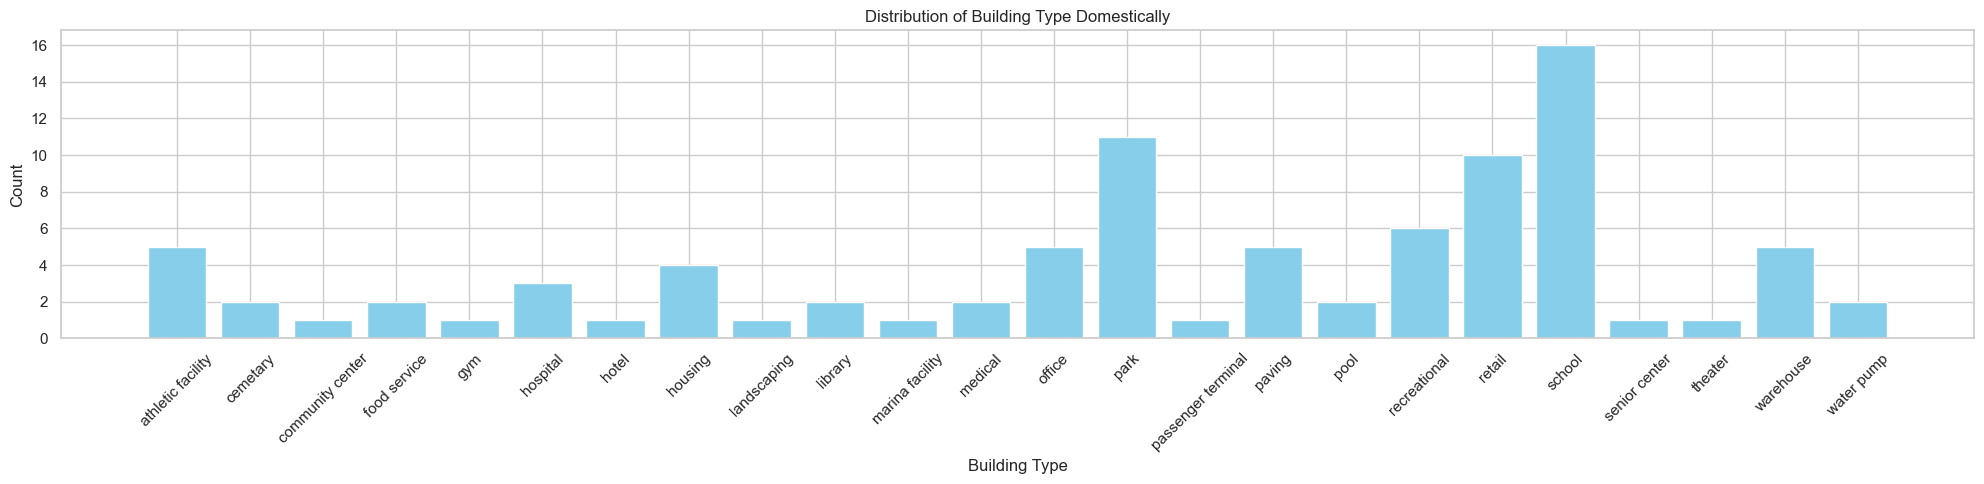

In [28]:
plt.figure(figsize=(20, 5)) 

plt.bar(building_count['building_type'], building_count['count'], color='skyblue')

plt.xlabel('Building Type')
plt.ylabel('Count')
plt.title('Distribution of Building Type Domestically')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [29]:
def region_building(df):
    regions = df['region'].unique()

    for region in regions:
        # Subset data for current region
        region_data = df[df['region'] == region]

        # Count frequencies of building types
        grouped = region_data['building_type'].value_counts().reset_index()
        # print(grouped)
        plt.figure(figsize=(8, 5))
        plt.xticks(rotation=45)
        plt.bar(grouped['building_type'], grouped['count'], color='skyblue')

        plt.xlabel('Building Types')
        plt.ylabel('Frequency')
        plt.title(f'Building Type Distribution in {region}')


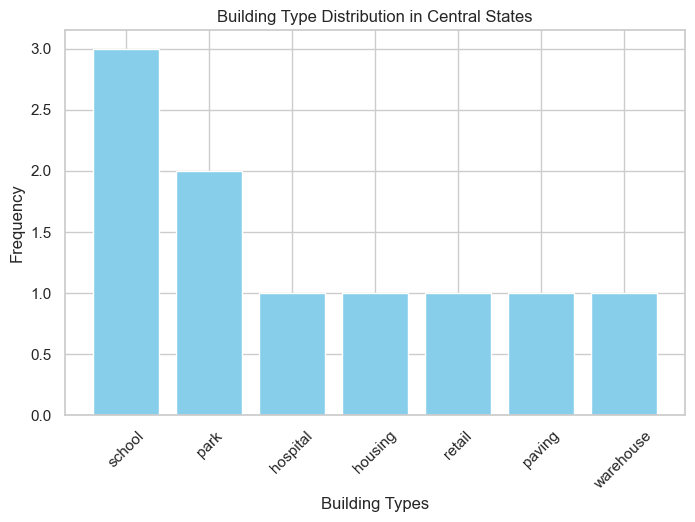

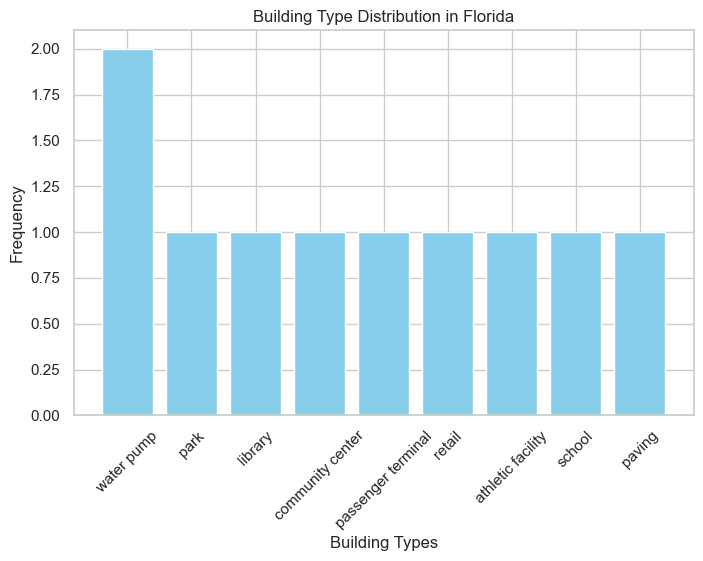

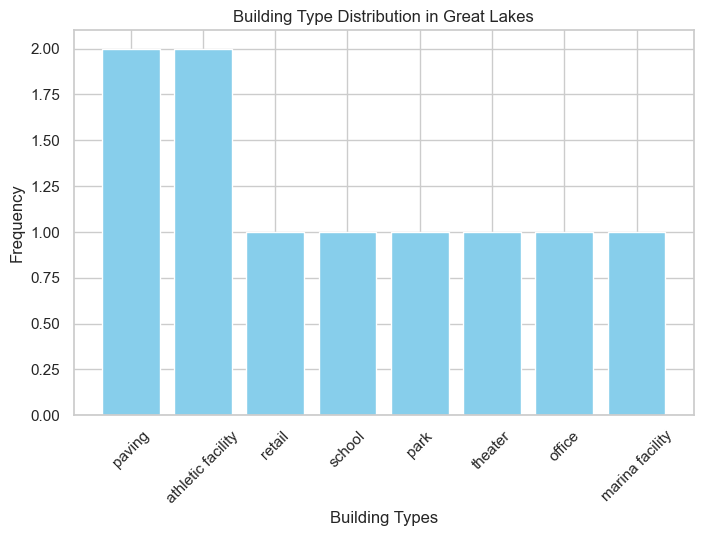

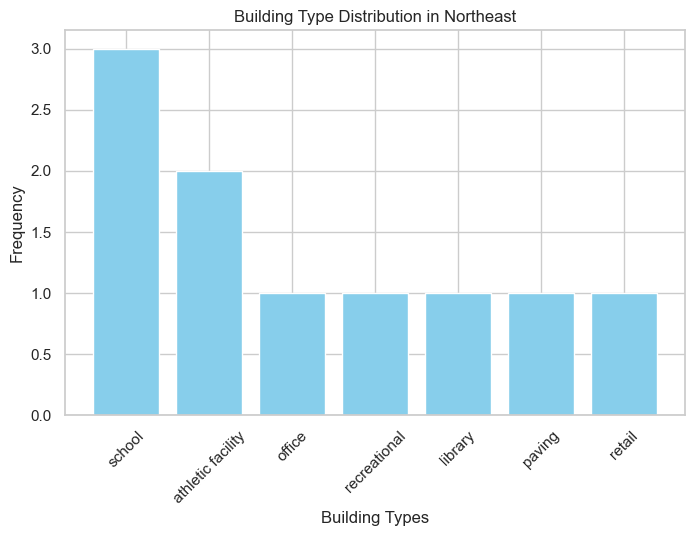

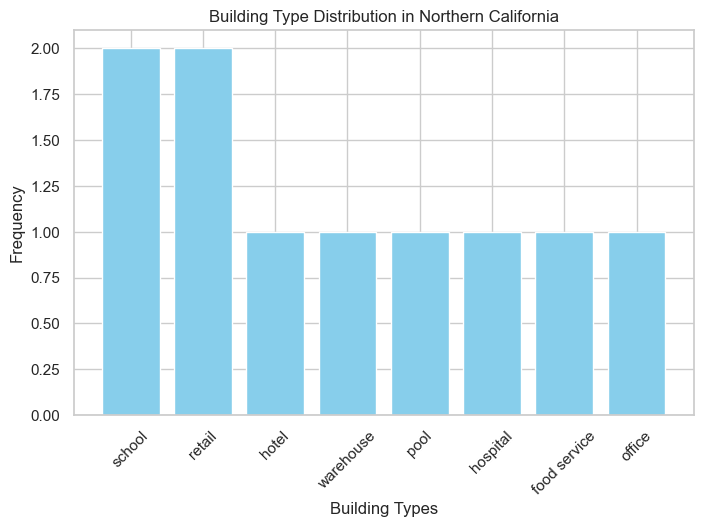

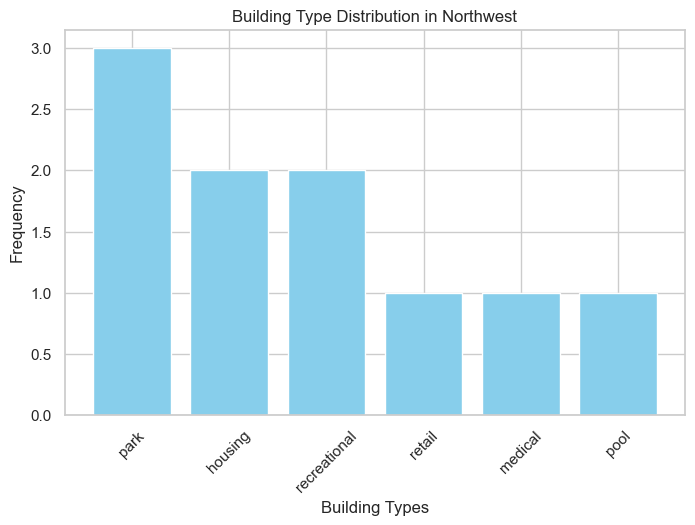

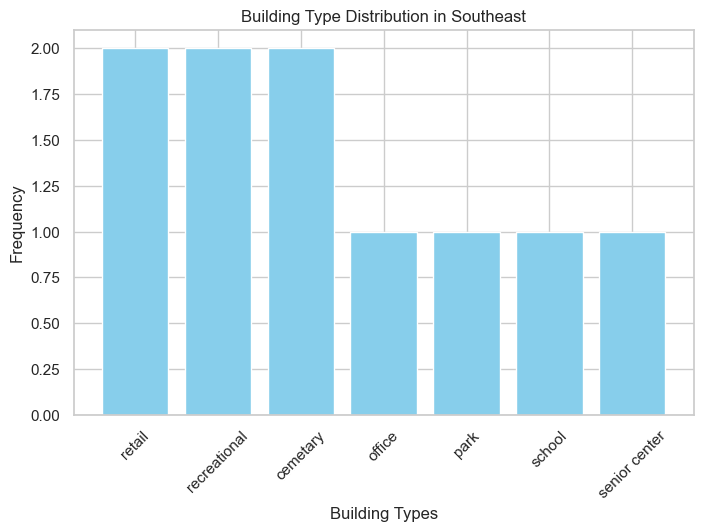

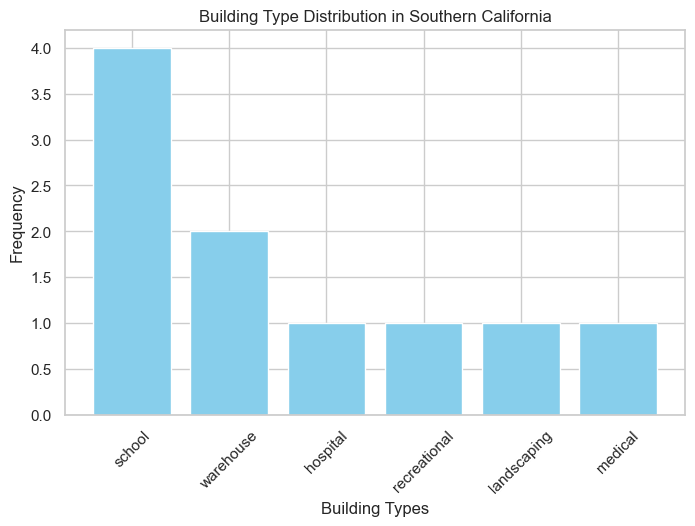

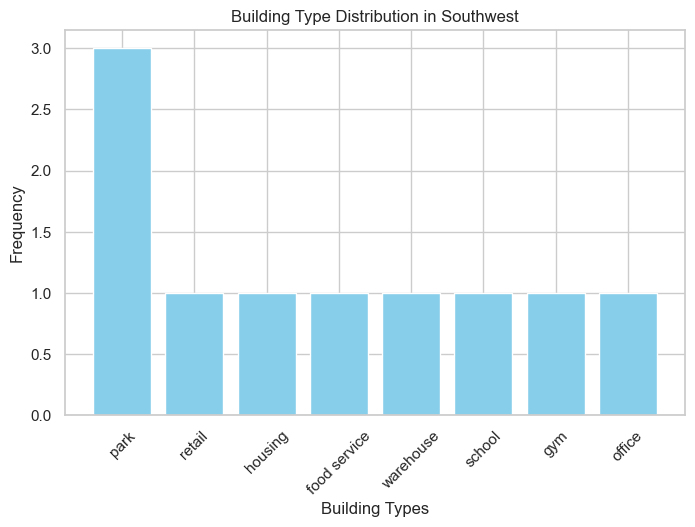

In [30]:
region_building(df)

#### Distribution of Mix Manufacturers

   mix_manufacturers  count
0              False     30
1               True     60


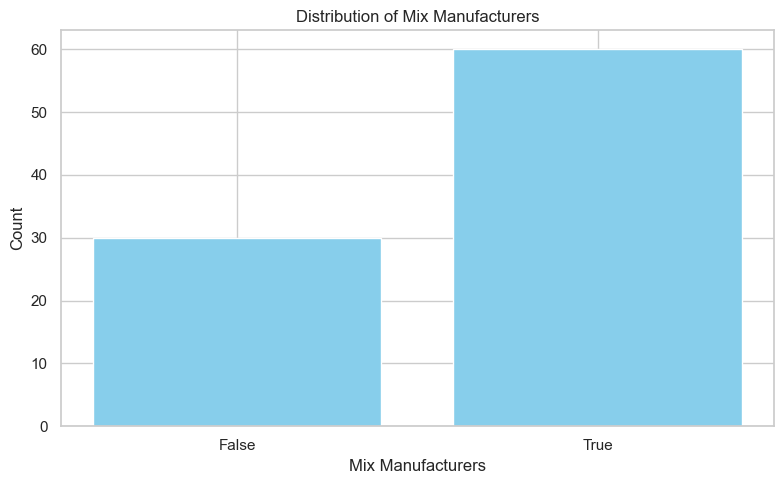

In [31]:
mix_count = df.groupby('mix_manufacturers').size().reset_index(name='count')

print(mix_count)

plt.figure(figsize=(8, 5)) 
# plt.bar(mix_count['mix_manufacturers'], mix_count['count'], color='skyblue')
plt.bar(mix_count['mix_manufacturers'].astype(str), mix_count['count'], color='skyblue')  # Convert to string for correct labeling


plt.xlabel('Mix Manufacturers')
plt.ylabel('Count')
plt.title('Distribution of Mix Manufacturers')

plt.tight_layout()
plt.show()

#### Distribution of Emission Types Domestically

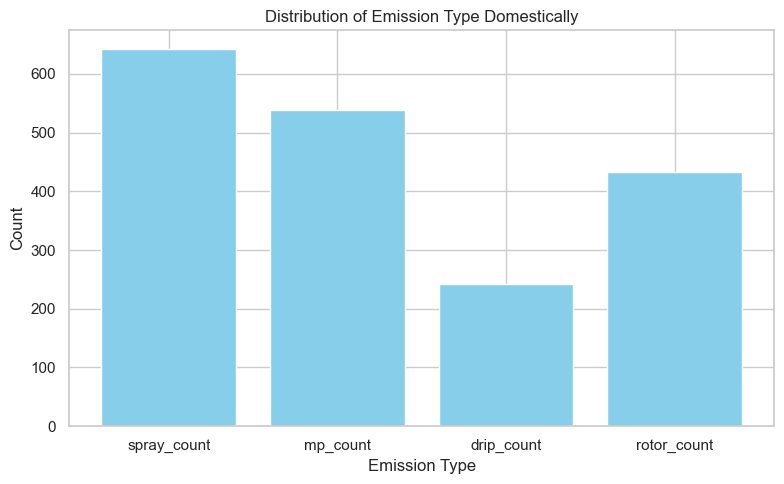

In [32]:
emission_sum = np.array(df.iloc[:, 4:8].sum(axis=0))
emission_name = np.array((df.iloc[:, 4:8]).columns)

plt.figure(figsize=(8, 5)) 

plt.bar(emission_name, emission_sum, color='skyblue')

plt.xlabel('Emission Type')
plt.ylabel('Count')
plt.title('Distribution of Emission Type Domestically')

# plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Distribution of Emission Types per Region

In [33]:
#create a datafram that looks like the data[:,i] so that we can still use the same syntax 
valve_sum = df.groupby('region').sum()
valve_sum = valve_sum.iloc[:,3:7]
valve_sum = valve_sum.reset_index()
valve_sum

,region,spray_count,mp_count,drip_count,rotor_count
0,Central States,120,32,23,75
1,Florida,74,65,8,22
2,Great Lakes,88,168,8,29
3,Northeast,53,18,40,21
4,Northern California,86,10,50,17
5,Northwest,42,118,10,42
6,Southeast,56,65,19,111
7,Southern California,59,53,38,77
8,Southwest,64,10,46,39


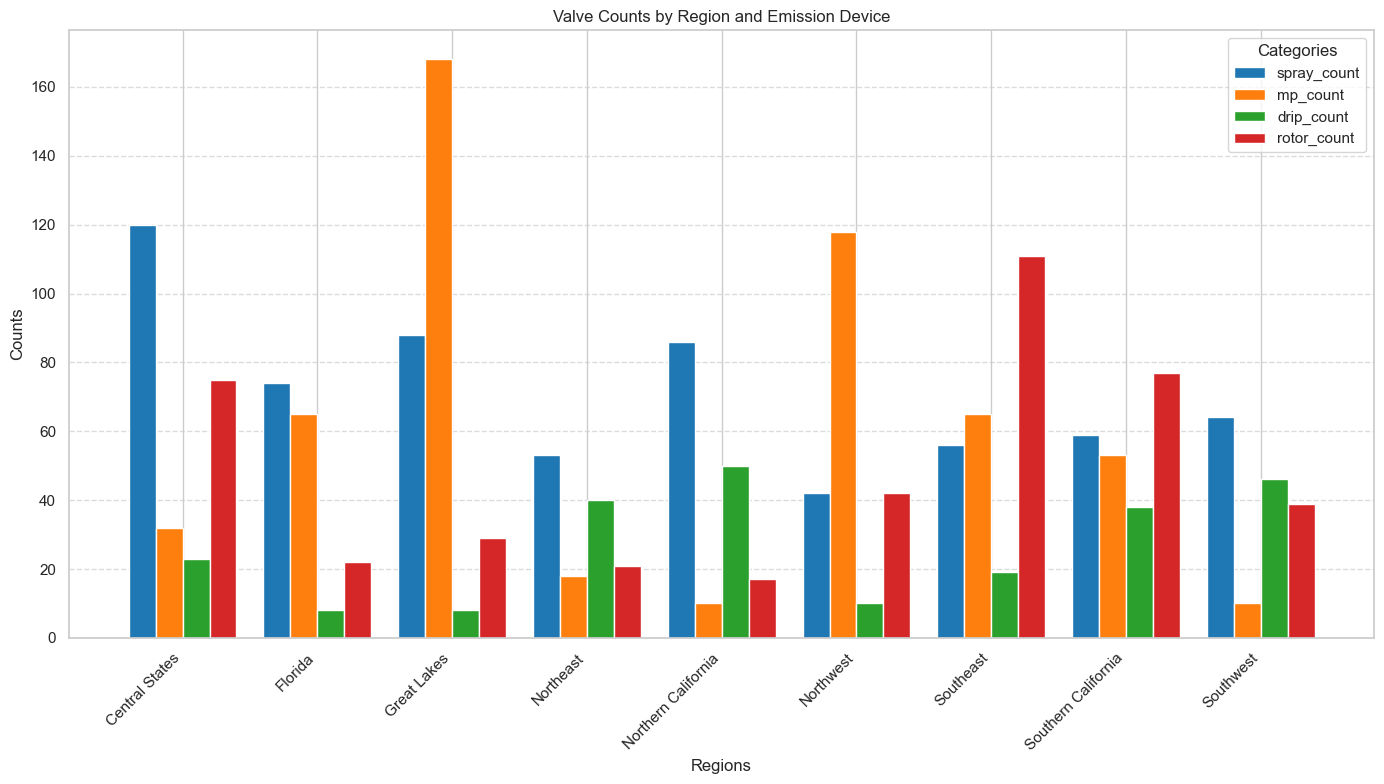

In [34]:
fig, ax = plt.subplots(figsize=(14, 8))

num_regions = len(valve_sum['region'])
num_categories = len(valve_sum.columns) - 1 

bar_width = 0.8 / num_categories
index = np.arange(num_regions)  

for i, category in enumerate(valve_sum.columns[1:]):
    offset = (i - num_categories / 2 + 0.5) * bar_width
    ax.bar(index + offset, valve_sum[category], bar_width, label=category)

ax.set_xlabel('Regions')
ax.set_ylabel('Counts')
ax.set_title('Valve Counts by Region and Emission Device')
ax.set_xticks(index)
ax.set_xticklabels(valve_sum['region'], rotation=45, ha='right')

ax.legend(title='Categories')

ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

#### Relationship Between Cost of Project and Region

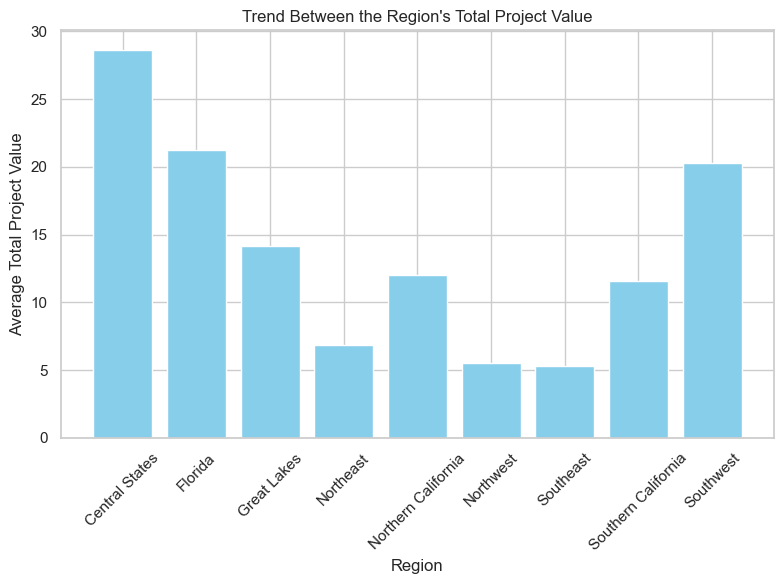

In [35]:
total_region = df.groupby('region')['value_mill'].mean()
total_region = total_region.reset_index()

plt.figure(figsize=(8, 6)) 

plt.bar(total_region['region'], total_region['value_mill'], color='skyblue')

plt.xlabel('Region')
plt.ylabel('Average Total Project Value')
plt.title('Trend Between the Region\'s Total Project Value')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Relationship Between Square Footage and Number of Valves

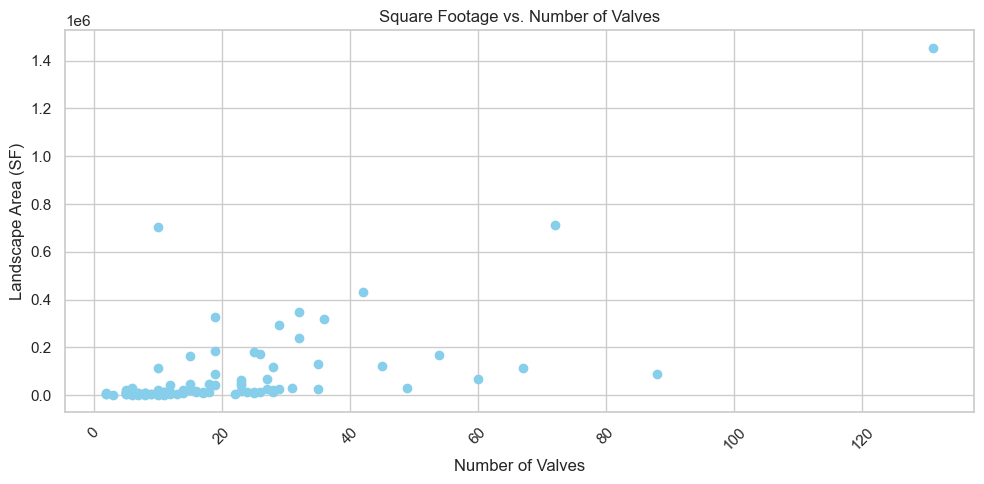

In [36]:
plt.figure(figsize=(10, 5)) 

plt.scatter(df['valve_count'], df['square_feet'], color='skyblue')

plt.xlabel('Number of Valves')
plt.ylabel('Landscape Area (SF)')
plt.title('Square Footage vs. Number of Valves')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Relationship Between Square Footage and Total Price of Project

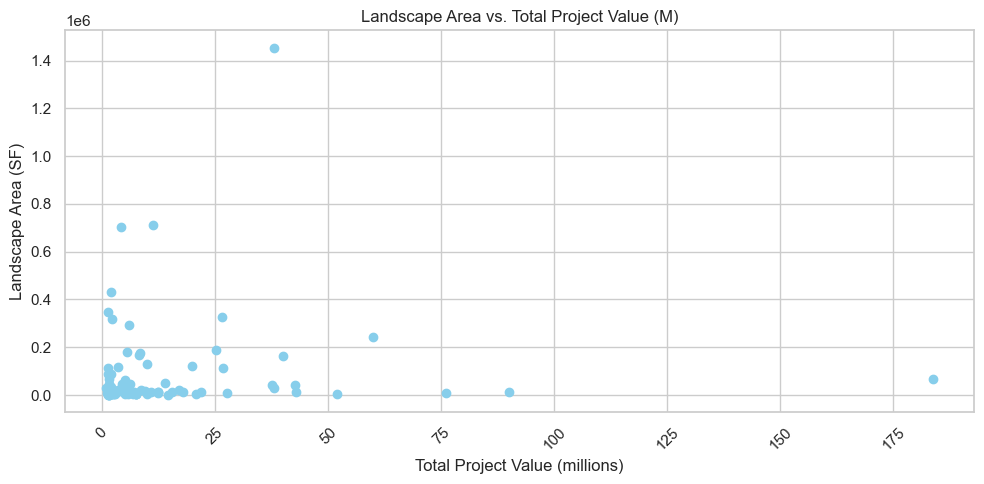

In [37]:
plt.figure(figsize=(10, 5)) 

plt.scatter(df['value_mill'], df['square_feet'], color='skyblue')

plt.xlabel('Total Project Value (millions)')
plt.ylabel('Landscape Area (SF)')
plt.title('Landscape Area vs. Total Project Value (M)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Trend Amongst Hunter's 9 Regions' Square Footage Average

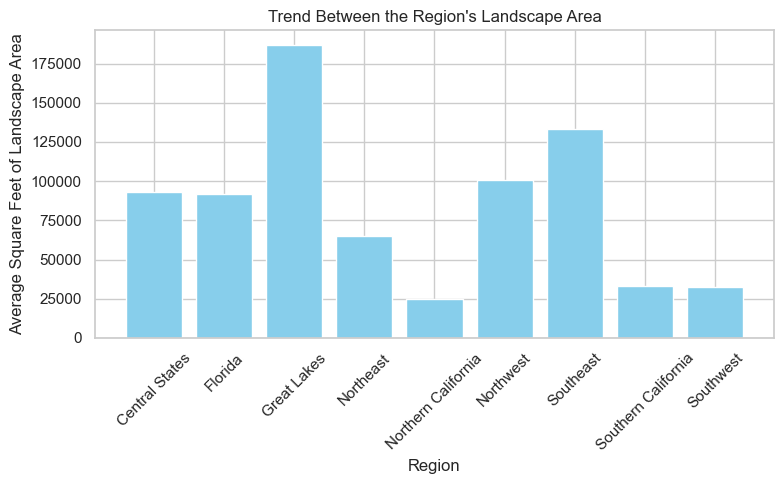

In [38]:
sf_region = df.groupby('region')['square_feet'].mean()
sf_region = sf_region.reset_index()

plt.figure(figsize=(8, 5)) 

plt.bar(sf_region['region'], sf_region['square_feet'], color='skyblue')

plt.xlabel('Region')
plt.ylabel('Average Square Feet of Landscape Area')
plt.title('Trend Between the Region\'s Landscape Area')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Trend Amongst Hunter's 9 Regions' Valve Count Average

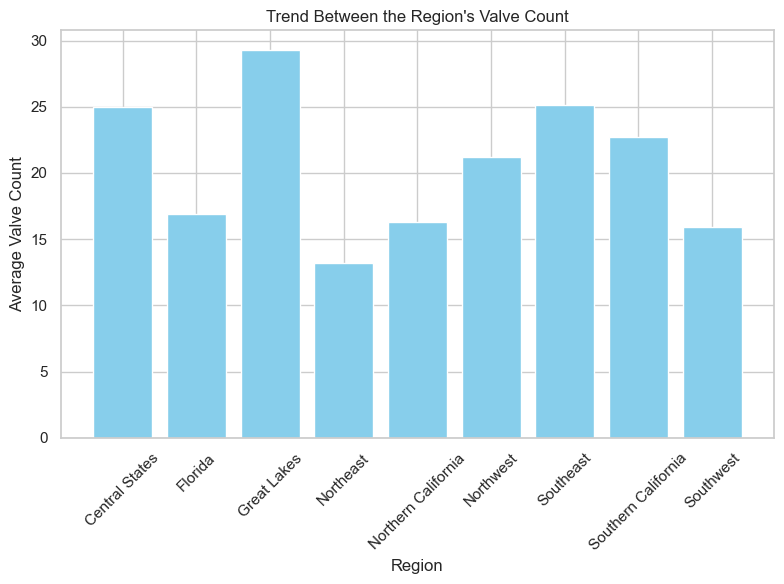

In [39]:
valve_region = df.groupby('region')['valve_count'].mean()
valve_region = valve_region.reset_index()

plt.figure(figsize=(8, 6)) 

plt.bar(valve_region['region'], valve_region['valve_count'], color='skyblue')

plt.xlabel('Region')
plt.ylabel('Average Valve Count')
plt.title('Trend Between the Region\'s Valve Count')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Trend Amongst Hunter's 9 Regions' Irrigation Monetary Value

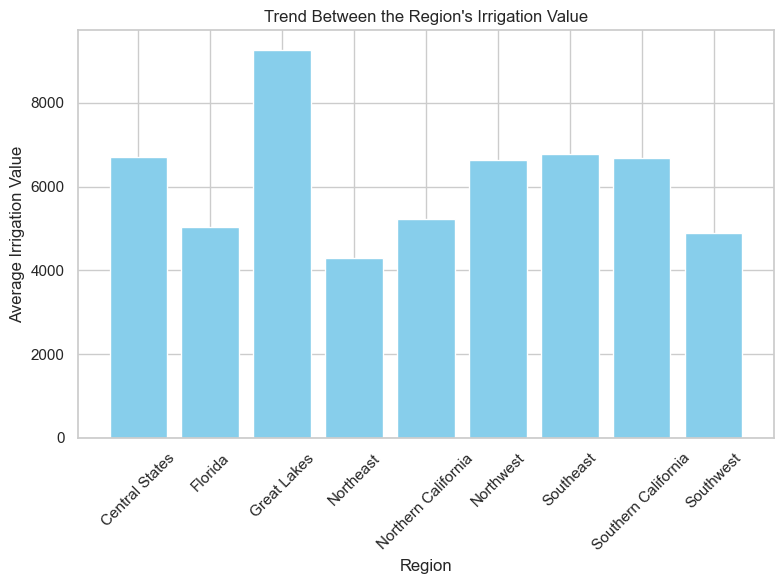

In [40]:
money_region = df.groupby('region')['est_irrig_value'].mean()
money_region = money_region.reset_index()

plt.figure(figsize=(8, 6)) 

plt.bar(money_region['region'], money_region['est_irrig_value'], color='skyblue')

plt.xlabel('Region')
plt.ylabel('Average Irrigation Value')
plt.title('Trend Between the Region\'s Irrigation Value')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Irrigation Sales from 2023

Domestically

| Region | Sales |
| ----------- | ----------- |
| `'Central State'` | $86,861,729.26 |
| `'Florida'` | $79,686,983.49 |
| `'Great Lakes'`| $39,048,791.55 |
| `'Northern California'` | $25,793,560.27 |
| `'Northeast'` | $48,945,176.18 |
| `'Northwest'` | $32,485,935.43 |
| `'Southern California'`| $29,951,923.33 |
| `'Southeast'` | $40,662,662.20 |
| `'Southwest'` | $29,855,769.90 |
| `'Total'` | $413,292,531.61 |

Internationally
| Region | Sales |
| ----------- | ----------- |
| `'China'` | $2,499,797.26 |
| `'Latin America'` | $13,840,776.36 |
| `'Middle East'`| $32,420,131.37 |
| `'Northern Europe'` | $33,484,822.44 |
| `'Pacific Rim'` | $26,095,198.90 |
| `'Southern Europe'` | $30,216,969.54 |
| `'Total'`| $138,557,695.87 |


## Step 5: Hypothesis Testing

To what magnitude does square footage/valve count/overall value predict irrigation monetary value?

In [41]:
df.head()

,id,region,building_type,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,mix_manufacturers,value_mill,general_contractor,est_irrig_value
0,202100847180,Central States,hospital,186652.0,14,0,5,0,19,True,25.2,Harvey Clearly Builders,5904.4
1,201900664272,Central States,school,28760.0,23,0,0,26,49,True,38.0,Pogue Construction,10707.1
2,202300402748,Central States,school,122296.0,27,0,11,7,45,False,20.0,Noble Texas Builders,13353.3
3,202300441418,Central States,school,8695.0,6,0,0,1,7,True,3.0,NaN,1701.4
4,202300082736,Central States,housing,3292.0,0,6,0,0,6,False,5.2,Cheyenne Construction Group,2185.2


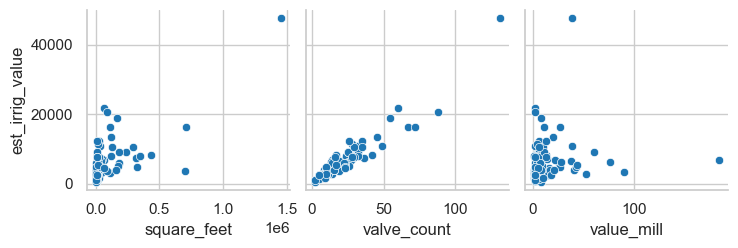

In [42]:
sns.pairplot(df, x_vars=['square_feet', 'valve_count', 'value_mill'], y_vars=['est_irrig_value'])
plt.show()

Null Hypothesis: $H_0$: The square footage/valve count/overall value significantly predicts the irrigation monetary value.

Alternate Hypothesis: $H_a$: The square footage/valve count/overall value does not significantly predicts the irrigation monetary value.

$\alpha$ = 0.05


In [43]:
import statsmodels.api as sm

# Define predictor variables and dependent variable
X = df[['square_feet', 'valve_count', 'value_mill']]
y = df['est_irrig_value']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        est_irrig_value   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     270.9
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           1.07e-43
Time:                        10:34:30   Log-Likelihood:                -808.14
No. Observations:                  90   AIC:                             1624.
Df Residuals:                      86   BIC:                             1634.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         183.5680    321.911      0.570      

We fail to reject the null hypothesis that the square footage/valve count/overall value predict irrigation monetary value due to the p-values:

- square_feet: 0.067 > 0.05
- valve_count: 0.000 < 0.05
- value_mill: 0.682 > 0.05

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 16388157.387200005
R-squared: 0.8389228226405111


# Conclusion and Results

# Project Log

> Week 1 (6/17-6/21)

- Getting settled and learning more about the project
- Setting up meetings with marketing strategy team members (3 meetings)

> Week 2 (6/24-6/28)

- Meeting with Dodge Representatives
    - Learned about the software
    - Answered questions about finding total specification rate, trends of projects overtime, etc.
- More meetings with marketing strategy team (7 meetings)
- Meeting with sales and analyst representative to gain insight on outside opinions on project
- Solidifying what variables to include in datasheet

> Week 3 and 4 (7/1-7/12)

- Last marketing strategy team meeting
    - Found out average net distributor net cost for relevant valves
- Had discussion with sales and product managing to determie best ways to find the gross estimate of valve values
- More discussion on how to calculate the monetary irrigation value
- Deep diving into DodgeBI and looking into relevant 2023 projects to fill out datasheet

> Week 5 (7/15-7/29)

- Check-in Meetings with Bryce
- Continuation on deep diving into DodgeBI and cultivating the datasheet

> Week 6 (7/22-7/26)
- Finished datasheet
- Begin reaching out and having meetings with Sales Managers in all 9 regions
    - gaining insight on our numbers as well as any specifics about their region
    - taking note of considerations to take dependant per region
- Started creating this jupyter notebook and data cleaning/wrangling

> Week 7 (7/29-8/2)
- Reading up on Variational Autoencoding in order to expand dataset
- Working closely with Mandla and Vince to help with importing necessary packages 
- Normalizing and one-hot encoding dataset
- Creating more visualizations

> Week 8 (8/5-8/9)
- Redirecting final product to use Steamlit --> simple usability
- Implementing variational autoencoding into dataset
- Working closely with Mandla and Vince when persistent bugs occur
- Creating more visualizations
- Finishing up Sales Meetings with Specification Managers

> Week 9 (8/12-8/16)
- Finalizing variational autoencoding to expand dataset
- Create a Streamlit report

> Week 10 (8/19-8/22)
- Create Final Presentation
- Present to Specification Managers and at Intern All-Hands Meeting
